# Import Libraries


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read The Dataset

In [2]:
#reading the data set
df=pd.read_csv('/content/drive/MyDrive/SmokeDetection_fire_alarm/smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
df.tail()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [4]:
df.shape

(62630, 16)

In [5]:
#checking the information of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [6]:
df.isnull().sum()
#checking null values and adding all those null values

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
#dropping th unnecessary columns
df.drop(columns = ['Unnamed: 0', 'UTC'], axis =1, inplace = True)

In [8]:
# Checking the value counts for target column
df['Fire Alarm'].value_counts()
# 1- Fire is there
# 0- No fire

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [9]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


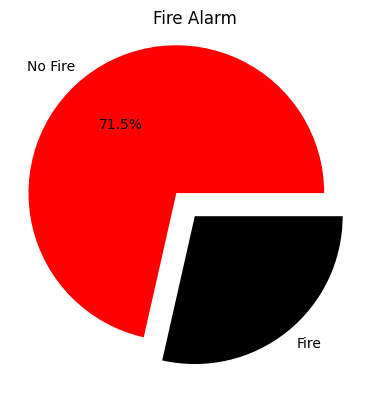

In [10]:
plt.pie(df['Fire Alarm'].value_counts(), [0.2, 0], labels=['No Fire', 'Fire'], autopct='%1.1f%%', colors=['red', 'black'])
plt.title('Fire Alarm')
plt.show()

<ipython-input-11-2e87ca64ca81>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature[C]'])


<Axes: xlabel='Temperature[C]', ylabel='Density'>

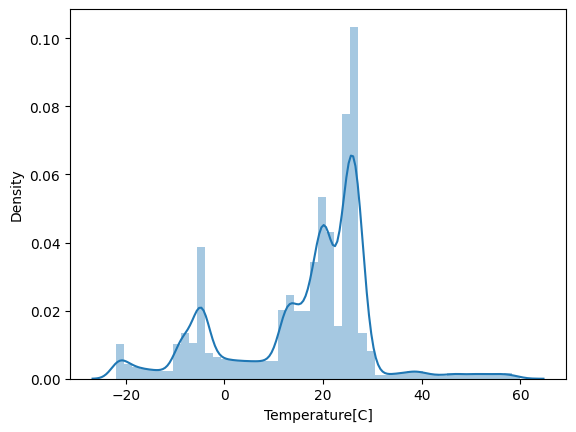

In [11]:
sns.distplot(df['Temperature[C]'])

<ipython-input-12-0e87e84a950f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity[%]'])


<Axes: xlabel='Humidity[%]', ylabel='Density'>

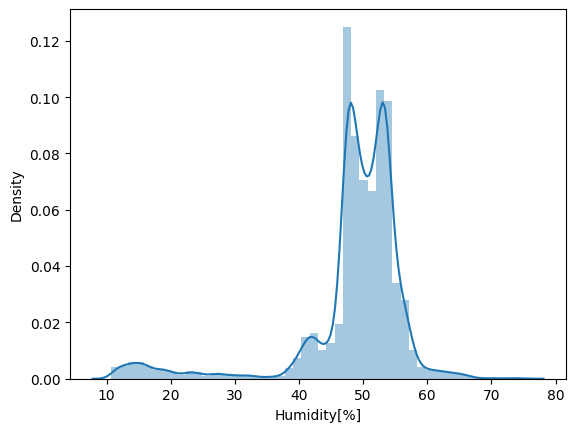

In [12]:
sns.distplot(df['Humidity[%]'])

<Axes: xlabel='NC1.0', ylabel='NC2.5'>

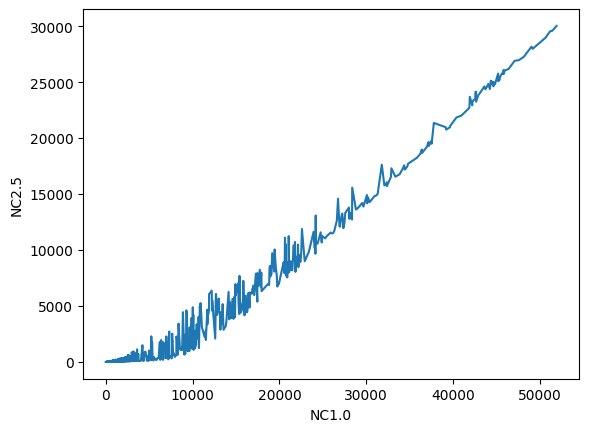

In [13]:
import seaborn as sns
sns.lineplot(x='NC1.0',y='NC2.5',data=df)

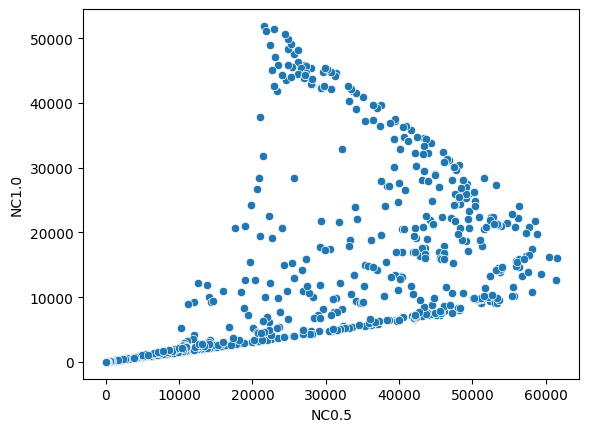

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='NC0.5', y='NC1.0', data=df)
plt.xlabel('NC0.5')
plt.ylabel('NC1.0')
plt.show()

<Axes: >

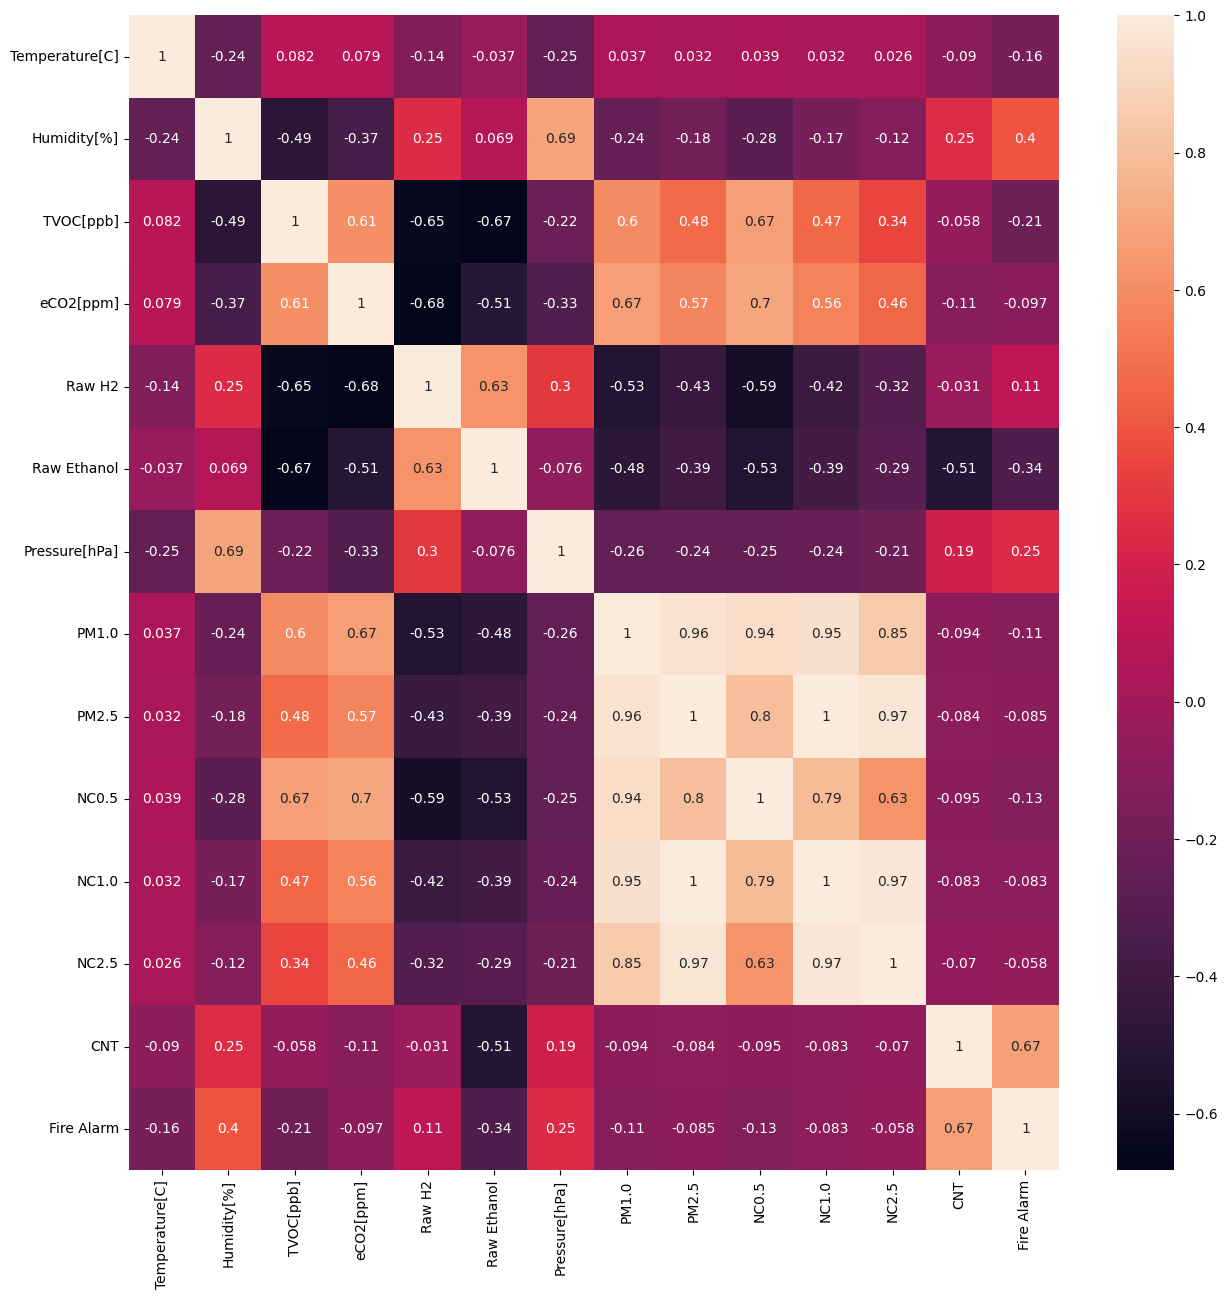

In [15]:
#correlation heatmap analysis
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)


In [16]:
df.drop(columns=['NC1.0','PM1.0'],axis=1,inplace=True)

In [17]:
# Finding the correlation between independent variables and dependent variable
df.corr()["Fire Alarm"].sort_values(ascending=False)

Fire Alarm        1.000000
CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
PM2.5            -0.084916
eCO2[ppm]        -0.097006
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
Name: Fire Alarm, dtype: float64

In [18]:
df.drop(columns = ['NC2.5', 'PM2.5', 'eCO2[ppm]'], axis = 1, inplace = True)

In [19]:
# Assigning the dataframe 'df' without the 'Fire Alarm' column to 'X'
X = df.drop(columns=['Fire Alarm'])

# Assigning the 'Fire Alarm' column from the dataframe 'df' to 'y'
y = df['Fire Alarm']

# Importing the MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of MinMaxScaler
scale = MinMaxScaler()

# Applying the MinMaxScaler to the 'X' dataframe and creating a new dataframe 'X_scaled'
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)

# Displaying the first few rows of the 'X_scaled' dataframe
X_scaled.head()

,Temperature[C],Humidity[%],TVOC[ppb],Raw H2,Raw Ethanol,Pressure[hPa],NC0.5,CNT
0,0.512692,0.723239,0.0,0.522488,0.525685,0.986014,0.0,0.00000
1,0.512875,0.712535,0.0,0.534928,0.547185,0.987013,0.0,0.00004
2,0.513046,0.701520,0.0,0.544179,0.565731,0.986347,0.0,0.00008
3,0.513229,0.690971,0.0,0.549282,0.579682,0.986125,0.0,0.00012
4,0.513412,0.681818,0.0,0.553429,0.591498,0.987013,0.0,0.00016


In [20]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)


In [21]:
# Importing SMOTE from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

# Creating an instance of SMOTE
smote = SMOTE()

# Applying SMOTE to the training sets
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Printing the value counts of y_train_smote
y_train_smote.value_counts()

0    31391
1    31391
Name: Fire Alarm, dtype: int64

# Now our data is cleaned and it’s time to build the model. We can train our data on different algorithms. For this project we are applying four classification algorithms. The best model is saved based on itsperformance.

In [22]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


model_lr = LogisticRegression()
model_lr.fit(x_train_smote, y_train_smote)
y_pred_test_lr = model_lr.predict(x_test)
y_pred_train_lr = model_lr.predict(x_train_smote)
test_acc_lr = accuracy_score(y_test, y_pred_test_lr)
train_acc_lr = accuracy_score(y_train_smote, y_pred_train_lr)


print('Logistic Regression Test Accuracy: ', test_acc_lr)
print(classification_report(y_test, y_pred_test_lr))


Logistic Regression Test Accuracy:  0.9452871360902656
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      5423
           1       0.99      0.93      0.96     13366

    accuracy                           0.95     18789
   macro avg       0.92      0.96      0.94     18789
weighted avg       0.95      0.95      0.95     18789



In [23]:
#SVM
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train_smote, y_train_smote)
y_pred_test_svm = model_svm.predict(x_test)
y_pred_train_svm = model_svm.predict(x_train_smote)
test_acc_svm = accuracy_score(y_test, y_pred_test_svm)
train_acc_svm = accuracy_score(y_train_smote, y_pred_train_svm)
print('SVM Test Accuracy: ', test_acc_svm)
print(classification_report(y_test, y_pred_test_svm))


SVM Test Accuracy:  0.9995742189579009
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5423
           1       1.00      1.00      1.00     13366

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [24]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train_smote, y_train_smote)
y_pred_test_gb = model_gb.predict(x_test)
y_pred_train_gb = model_gb.predict(x_train_smote)
test_acc_gb = accuracy_score(y_test, y_pred_test_gb)
train_acc_gb = accuracy_score(y_train_smote, y_pred_train_gb)

print('Gradient Boosting Test Accuracy: ', test_acc_gb)
print(classification_report(y_test, y_pred_test_gb))


Gradient Boosting Test Accuracy:  0.9999467773697376
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5423
           1       1.00      1.00      1.00     13366

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [25]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train_smote, y_train_smote)
y_pred_test_knn = model_knn.predict(x_test)
y_pred_train_knn = model_knn.predict(x_train_smote)
test_acc_knn = accuracy_score(y_test, y_pred_test_knn)
train_acc_knn = accuracy_score(y_train_smote, y_pred_train_knn)

print('KNN Test Accuracy', test_acc_knn)

print(classification_report(y_test, y_pred_test_knn))


KNN Test Accuracy 0.9996274415881633
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5423
           1       1.00      1.00      1.00     13366

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [26]:
model_knn.predict([[20.05,55.28,0,12390,18849,939.736,0,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [27]:
model_lr.predict([[20.05,55.28,0,12390,18849,939.736,0,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [28]:
model_svm.predict([[20.05,55.28,0,12390,18849,939.736,0,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [29]:
model_gb.predict([[20.05,55.28,0,12390,18849,939.736,0,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1])

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Define the list of model names
model_names = ['Logistic Regression', 'SVM', 'Gradient Boosting', 'KNN']

# Define the list of predicted test labels for each model
y_pred_tests = [y_pred_test_lr,y_pred_test_svm, y_pred_test_gb, y_pred_test_knn]

# Create an empty dataframe to store the comparison results
results_df = pd.DataFrame(columns=['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1-score'])

# Loop through each model and calculate the evaluation metrics
for i, model_name in enumerate(model_names):
    model = model_names[i]
    y_pred_test = y_pred_tests[i]

    test_acc = accuracy_score(y_test, y_pred_test)
    classification = classification_report(y_test, y_pred_test, output_dict=True)
    precision = classification['macro avg']['precision']
    recall = classification['macro avg']['recall']
    f1_score = classification['macro avg']['f1-score']

    results_df = results_df.append({'Model': model_name,
                                    'Test Accuracy': test_acc,
                                    'Precision': precision,
                                    'Recall': recall,
                                    'F1-score': f1_score}, ignore_index=True)



#Display the results in table
print(results_df)

<ipython-input-30-c45bea94a0e7>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
<ipython-input-30-c45bea94a0e7>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,


                 Model  Test Accuracy  Precision    Recall  F1-score
0  Logistic Regression       0.945287   0.921956  0.955517  0.936068
1                  SVM       0.999574   0.999646  0.999317  0.999481
2    Gradient Boosting       0.999947   0.999908  0.999963  0.999935
3                  KNN       0.999627   0.999683  0.999409  0.999546


<ipython-input-30-c45bea94a0e7>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,
<ipython-input-30-c45bea94a0e7>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': model_name,


# From above svm, knn, gradient boosting seems to be overfitting. Considering logistic regression model as appropriate model From all the models, we considered logistic Regression to avoid over-fitting problem and we save the modle.

In [31]:
# Import the necessary libraries for working with Google Drive
from google.colab import drive
import pickle

# Mount your Google Drive
drive.mount('/content/drive')

# Specify the path where you want to save the model on your Google Drive
# Replace 'your_path' with the desired path on your Google Drive
model_save_path = '/content/drive/My Drive/SmokeDetection_fire_alarm/smoke.pkl'

# Save the model to your Google Drive
with open(model_save_path, 'wb') as file:
    pickle.dump(model_lr, file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
